In [3]:
### Learnings about Signals from indicators ###
### Import dependencies ###
from pandas_datareader import data as pdr
from matplotlib.pylab import date2num
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf
import tushare as ts
import pandas as pd
import numpy as np
import talib as ta

# Plot Theme
plt.style.use('bmh')

# Ignorar warings
import warnings
warnings.filterwarnings("ignore")
# Get Data Frames from Yahoo! Finance
# yfinance is used to fetch data 
yf.pdr_override()
# input
symbol = 'FB'
start = '2017-01-01'
end = '2020-07-31'
# Read data 
df = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
### SIGNAL - Simple Moving Average (SMA) Signals ####
def SMA(data, ndays): 
    SMA = pd.Series(data['Adj Close'].rolling(ndays).mean(), name = 'SMA'+str(ndays)) 
    data = data.join(SMA) 
    data = data.dropna() # Clear NaN data
    return data

sma_df = df.copy()
# Get SMA
sma_df = SMA(sma_df,50)
sma_df = SMA(sma_df,20)

sma_df['Signal'] = 0.0
sma_df['Signal'] = np.where(sma_df['SMA20'] > sma_df['SMA50'], 1.0, 0.0)
sma_df['Position'] = sma_df['Signal'].diff() # display first few rows
# Show dataFame
sma_df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA20,Signal,Position
Date,,,,,,,,,,
2017-04-11,140.800003,141.029999,138.809998,139.919998,139.919998,16638100,137.365200,140.770999,1.0,NaN
2017-04-12,139.720001,140.399994,139.440002,139.580002,139.580002,11612500,137.550399,140.763999,1.0,0.0
2017-04-13,139.619995,140.580002,139.330002,139.389999,139.389999,10965600,137.673600,140.733999,1.0,0.0
2017-04-17,139.759995,141.550003,139.750000,141.419998,141.419998,11519700,137.885200,140.812999,1.0,0.0
2017-04-18,141.270004,141.910004,140.610001,140.960007,140.960007,14807500,138.084800,140.863999,1.0,0.0


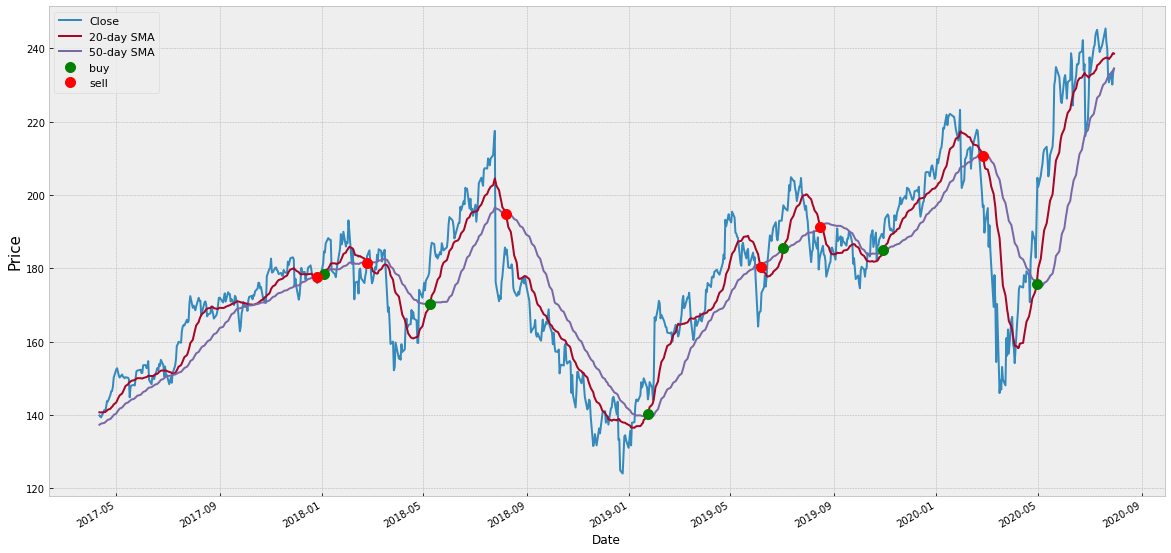

In [5]:
### Plot SIGNAL - Simple Moving Average (SMA) ###
# Some styling
plt.figure(figsize = (20,10))
# Plot close price, short-term and long-term moving averages 
sma_df['Adj Close'].plot(label= 'Close') 
sma_df['SMA20'].plot(label = '20-day SMA') 
sma_df['SMA50'].plot(label = '50-day SMA')

plt.plot(sma_df[sma_df['Position'] == 1].index, 
         sma_df['SMA20'][sma_df['Position'] == 1], 
         'go', markersize = 10, color = 'g', label = 'buy') # plot "buy" signals

plt.plot(sma_df[sma_df['Position'] == -1].index, 
         sma_df['SMA20'][sma_df['Position'] == -1], 
         'ro', markersize = 10, color = 'r', label = 'sell') # plot "sell" signals

# Some styling
plt.ylabel('Price', fontsize = 15 )
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [6]:
### SIGNAL - Exponential Moving Average (EMA) ###
import talib as ta
def EMA(data,period):
    EMA = pd.Series(ta.EMA(data['Adj Close'], timeperiod = period), name = 'EMA'+str(period))
    data = data.join(EMA)
    data = data.dropna() # Clear NaN data
    return data

ema_df = df.copy()
# Get EMA
ema_df = EMA(ema_df, 50)
ema_df = EMA(ema_df, 20)


ema_df['Signal'] = 0.0  
ema_df['Signal'] = np.where(ema_df['EMA20'] > ema_df['EMA50'], 1.0, 0.0)# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
ema_df['Position'] = ema_df['Signal'].diff()
# Show EMA dataFrame
ema_df

,Open,High,Low,Close,Adj Close,Volume,EMA50,EMA20,Signal,Position
Date,,,,,,,,,,
2017-04-11,140.800003,141.029999,138.809998,139.919998,139.919998,16638100,136.746194,140.770999,1.0,NaN
2017-04-12,139.720001,140.399994,139.440002,139.580002,139.580002,11612500,136.857324,140.657571,1.0,0.0
2017-04-13,139.619995,140.580002,139.330002,139.389999,139.389999,10965600,136.956645,140.536850,1.0,0.0
2017-04-17,139.759995,141.550003,139.750000,141.419998,141.419998,11519700,137.131678,140.620959,1.0,0.0
2017-04-18,141.270004,141.910004,140.610001,140.960007,140.960007,14807500,137.281809,140.653249,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,229.304263,237.410546,1.0,0.0
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,229.468801,237.038113,1.0,0.0
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,229.494338,236.379244,1.0,0.0


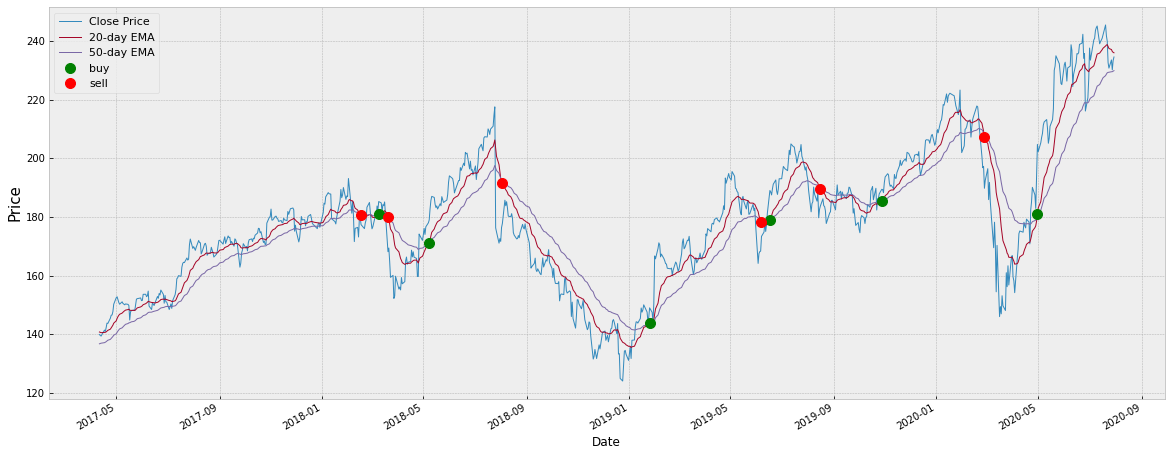

In [7]:
### SIGNAL - Plot SIGNAL EMA  ###
plt.figure(figsize = (20,8))
# Plot close price, short-term and long-term moving averages 
ema_df['Adj Close'].plot(lw = 1, label = 'Close Price')  
ema_df['EMA20'].plot(lw = 1, label = '20-day EMA') 
ema_df['EMA50'].plot(lw = 1, label = '50-day EMA')

plt.plot(ema_df[ema_df['Position'] == 1].index, 
         ema_df['EMA20'][ema_df['Position'] == 1], 
         'go', markersize = 10, color = 'g', label = 'buy') # "buy" and 'buy' signals

plt.plot(ema_df[ema_df['Position'] == -1].index, 
         ema_df['EMA20'][ema_df['Position'] == -1], 
         'ro', markersize = 10, color = 'r', label = 'sell') # "buy" and 'sell' signals

# Some styling
plt.ylabel('Price', fontsize = 15 )
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [8]:
### SIGNAL - Exponentially-weighted Moving Average (EWMA or WMA) ###
def EWMA(data, ndays): 
    EWMA = pd.Series(data['Adj Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EWMA) 
    # Clear NaN data
    data = data.dropna()
    return data

ewma_df = df.copy()
ewma_df = EWMA(ewma_df,20)
ewma_df = EWMA(ewma_df,50)

ewma_df['Signal'] = 0.0  
ewma_df['Signal'] = np.where(ewma_df['EWMA_20'] > ewma_df['EWMA_50'], 1.0, 0.0)
ewma_df['Position'] = ewma_df['Signal'].diff()
# Show EMA dataFrame
ewma_df

,Open,High,Low,Close,Adj Close,Volume,EWMA_20,EWMA_50,Signal,Position
Date,,,,,,,,,,
2017-04-07,141.199997,141.550003,140.240005,140.779999,140.779999,11818300,140.423329,138.899825,1.0,NaN
2017-04-10,141.000000,141.429993,140.630005,141.039993,141.039993,9039400,140.482124,138.996885,1.0,0.0
2017-04-11,140.800003,141.029999,138.809998,139.919998,139.919998,16638100,140.428535,139.038495,1.0,0.0
2017-04-12,139.720001,140.399994,139.440002,139.580002,139.580002,11612500,140.347649,139.062761,1.0,0.0
2017-04-13,139.619995,140.580002,139.330002,139.389999,139.389999,10965600,140.256369,139.077344,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,237.410546,229.304263,1.0,0.0
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,237.038113,229.468801,1.0,0.0
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,236.379244,229.494338,1.0,0.0


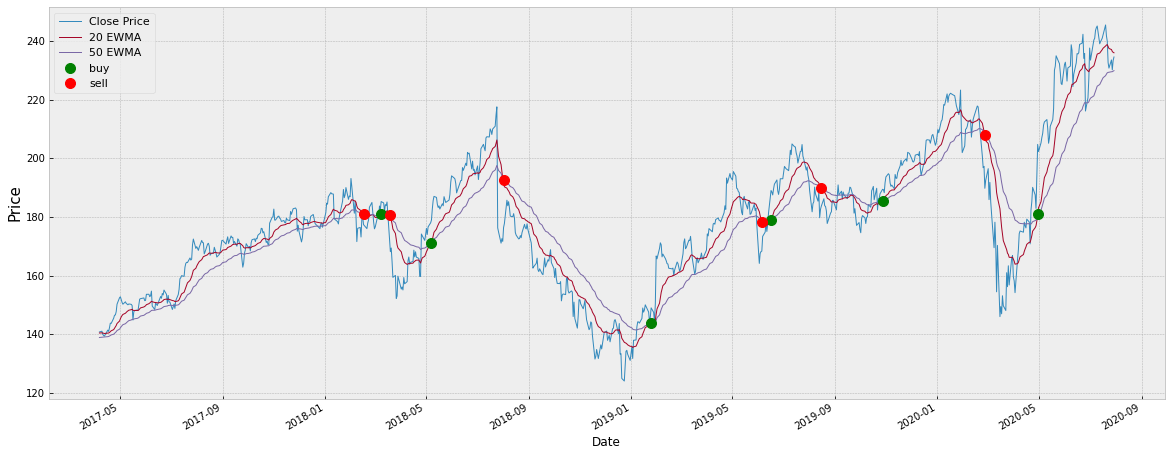

In [9]:
# SIGNAL - Plot SIGNAL EMA
plt.figure(figsize = (20,8))
# plot close price, short-term and long-term moving averages 
ewma_df['Adj Close'].plot(lw = 1, label = 'Close Price')  
ewma_df['EWMA_20'].plot(lw = 1, label = '20 EWMA') 
ewma_df['EWMA_50'].plot(lw = 1, label = '50 EWMA')

plt.plot(ewma_df[ewma_df['Position'] == 1].index, 
         ewma_df['EWMA_20'][ewma_df['Position'] == 1], 
         'go', markersize = 10, color = 'g', label = 'buy')

plt.plot(ewma_df[ewma_df['Position'] == -1].index, 
         ewma_df['EWMA_50'][ewma_df['Position'] == -1], 
         'ro', markersize = 10, color = 'r', label = 'sell')

# Some styling
plt.ylabel('Price', fontsize = 15 )
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [10]:
### SIGNAL - Relative Strength Index (RSI) ###
def RSI(data, period):
    RSI = pd.Series(
        ta.RSI(data['Adj Close'],period), 
        name = 'RSI')
    data = data.join(RSI)
    data = data.dropna()
    return data

# Calcular el RSI 
rsi_df = df.copy()
rsi_df = RSI(rsi_df, 14)

rsi_df['Positions'] = 0

rsi_df['Positions'] = np.select([rsi_df['RSI']<30, rsi_df['RSI']>70], [1,-1], default=0)
rsi_df['Signals'] = rsi_df['Positions'].diff()
rsi_df = rsi_df.dropna()

# Signals
buys = rsi_df.loc[rsi_df['Signals'] == 1]
sells = rsi_df.loc[rsi_df['Signals'] == -1]

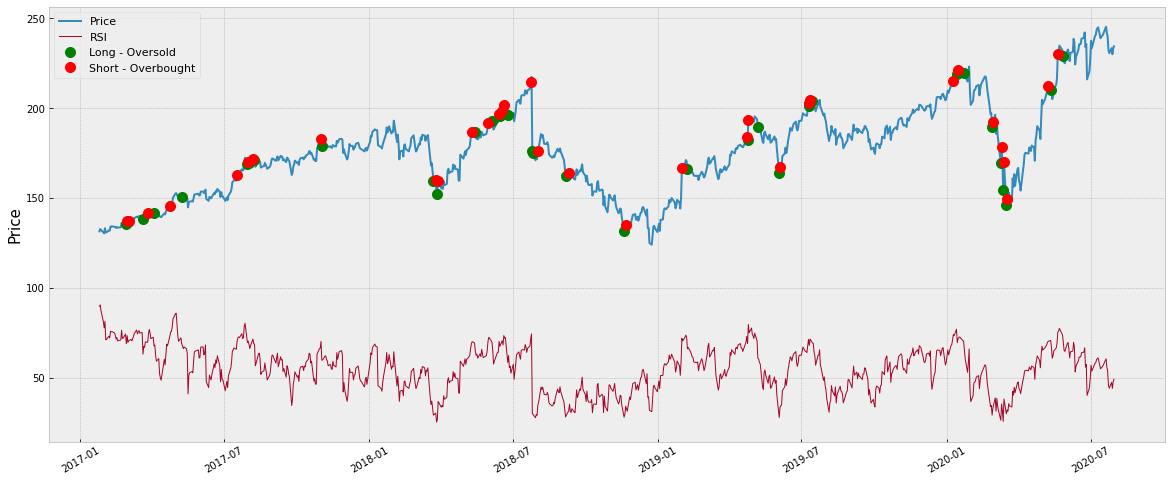

In [13]:
# SIGNAL - Plot SIGNAL RSI
plt.figure(figsize = (20,8))
plt.plot(rsi_df.index, rsi_df['Adj Close'], label='Price')
plt.plot(rsi_df['RSI'],lw=1, label='RSI')
plt.plot(buys.index, rsi_df.loc[buys.index]['Adj Close'],'go', markersize=10, color='g', label='Long - Oversold')
plt.plot(sells.index, rsi_df.loc[sells.index]['Adj Close'], 'ro', markersize=10, color='r', label='Short - Overbought')
# Some styling
plt.ylabel('Price', fontsize = 15 )
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

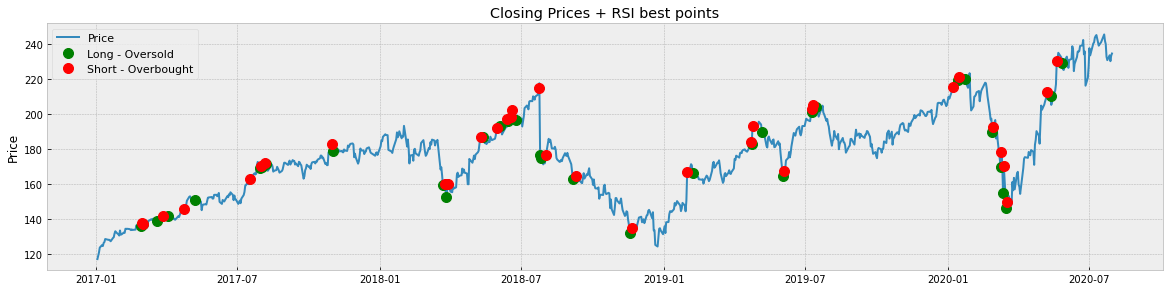

In [14]:
# RSI Subplots
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'], label='Price')
ax1.plot(buys.index, rsi_df.loc[buys.index]['Adj Close'],'go', markersize=10, color='g', label='Long - Oversold')
ax1.plot(sells.index, rsi_df.loc[sells.index]['Adj Close'], 'ro', markersize=10, color='r', label='Short - Overbought')
ax1.set_title('Closing Prices + RSI best points')
ax1.set_ylabel('Price')
ax1.grid()
ax1.legend(loc=2,prop={'size':11})
ax1.grid(True)

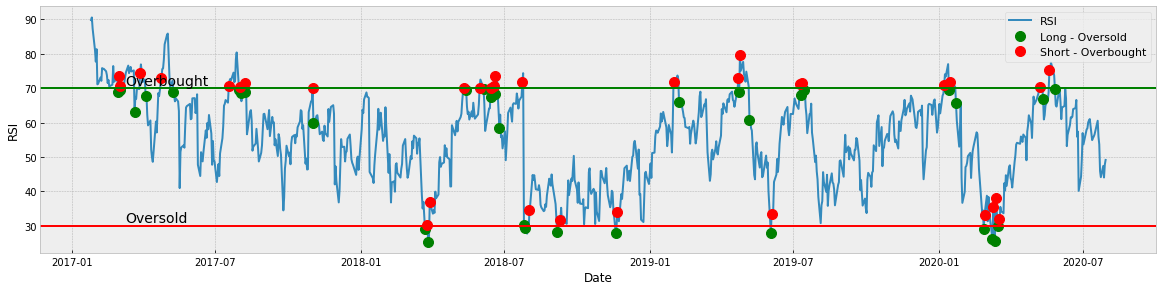

In [15]:
# Plot SIGNAL - Plot Relative Strength Index (RSI) with bars
fig = plt.figure(figsize=(20,10))
ax2 = plt.subplot(2, 1, 2)
ax2.plot(rsi_df['RSI'], label='RSI')
ax2.text(s='Overbought', x=rsi_df.RSI.index[30], y=71, fontsize=14)
ax2.text(s='Oversold', x=rsi_df.RSI.index[30], y=31, fontsize=14)
ax2.plot(buys.index, rsi_df.loc[buys.index]['RSI'],'go', markersize=10, color='g', label='Long - Oversold')
ax2.plot(sells.index, rsi_df.loc[sells.index]['RSI'], 'ro', markersize=10, color='r', label='Short - Overbought')
ax2.axhline(y=70, color='g')
ax2.axhline(y=30, color='r')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend(loc=1,prop={'size':11})
ax2.grid(True)

In [16]:
### SIGNAL - Bollinger Bands (BBAND) ###
def BBANDS(data, n):
    MA = data.Close.rolling(n).mean()
    SD = data.Close.rolling(n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data

n = 100  # Periods
bbands_df = df.copy()
bbands_df = BBANDS(bbands_df, n)

# Get Bollinger Bands (BBAND) signials
bbans_buys = bbands_df.loc[bbands_df['Adj Close'] > bbands_df['UpperBB']]
bbans_sells = bbands_df.loc[bbands_df['Adj Close'] < bbands_df['LowerBB']]

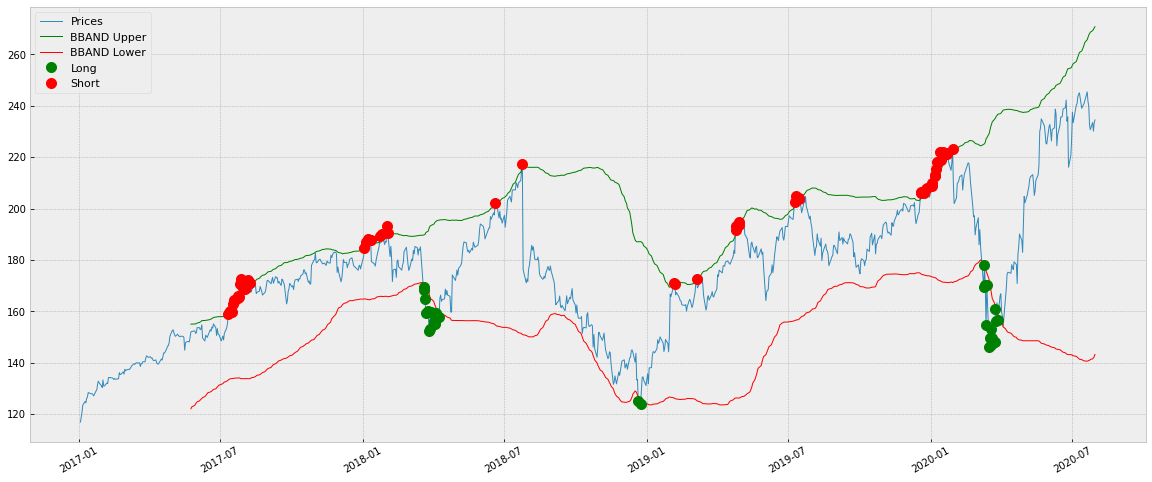

In [17]:
# SIGNAL - Bollinger Bands (BBAND)
# Some styling
plt.figure(figsize=(20,8))
# Plot data
plt.plot(bbands_df['Adj Close'],lw=1, label='Prices')
plt.plot(bbands_df['UpperBB'],'g',lw=1,label='BBAND Upper')
plt.plot(bbands_df['LowerBB'],'r',lw=1, label='BBAND Lower')
plt.plot(bbans_sells.index, bbands_df.loc[bbans_sells.index]['Adj Close'],'go', markersize=10, color='g', label='Long')
plt.plot(bbans_buys.index, bbands_df.loc[bbans_buys.index]['Adj Close'], 'ro', markersize=10, color='r', label='Short')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()


In [18]:
### SIGNAL - Channels ###
### Trend Lines ####
from scipy.stats import linregress

data0 = df[:50].copy()
data0['date_id'] = ((data0.index.date - data0.index.date.min())).astype('timedelta64[D]')
data0['date_id'] = data0['date_id'].dt.days + 1

# Get high trend line
data1 = data0.copy()
while len(data1)>3:

    reg = linregress(x=data1['date_id'],y=data1['High'])
    data1 = data1.loc[data1['High'] > reg[0] * data1['date_id'] + reg[1]]

reg = linregress(x=data1['date_id'],y=data1['High'])
data0['high_trend'] = reg[0] * data0['date_id'] + reg[1]

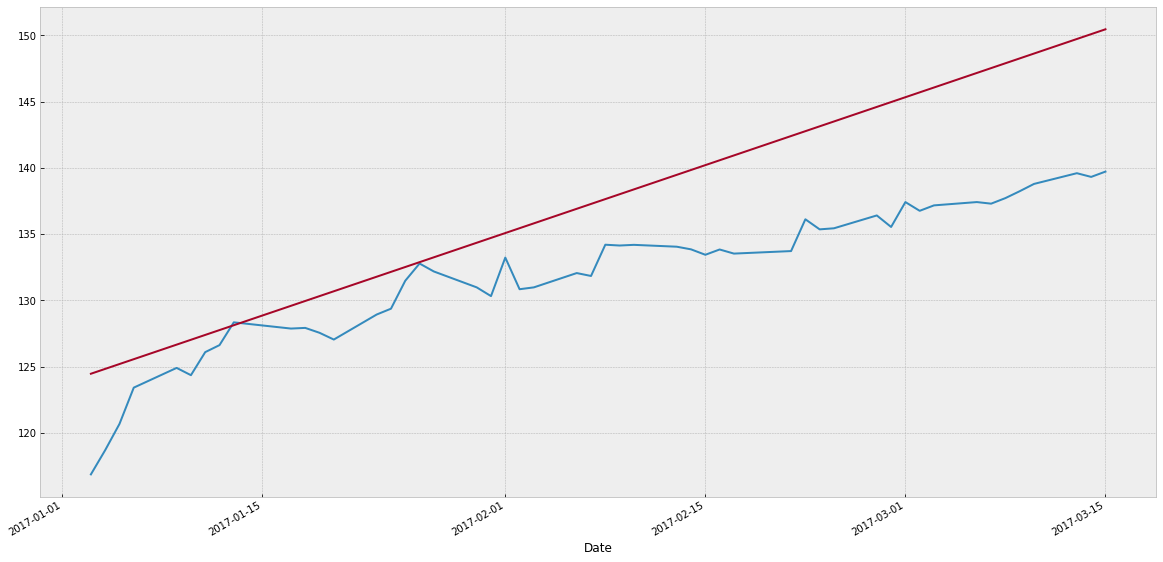

In [19]:
### Plot High trend line ###
# Some styling
plt.figure(figsize = (20,10))
# Plot
data0['Close'].plot()
data0['high_trend'].plot()

In [20]:
### Get Low trend line ###
data1 = data0.copy()

while len(data1)>3:
    reg = linregress(x=data1['date_id'],y=data1['Low'])
    data1 = data1.loc[data1['Low'] < reg[0] * data1['date_id'] + reg[1]]

reg = linregress(x=data1['date_id'],y=data1['Low'])

data0['low_trend'] = reg[0] * data0['date_id'] + reg[1]

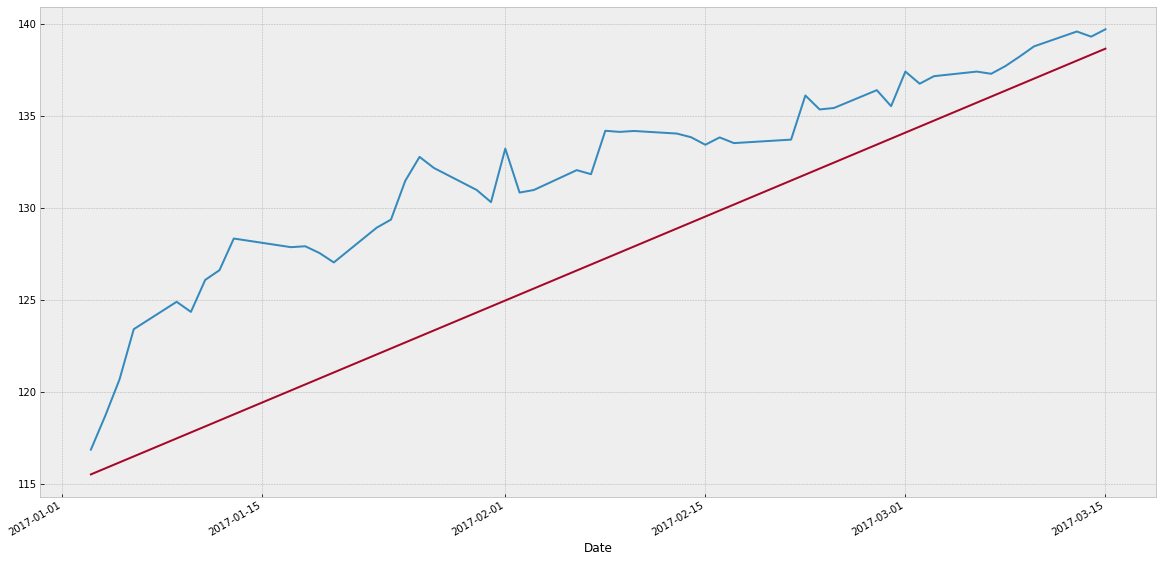

In [21]:
### Plot low trend line ###
# Some styling
plt.figure(figsize = (20,10))
# Plot
data0['Close'].plot()
data0['low_trend'].plot()

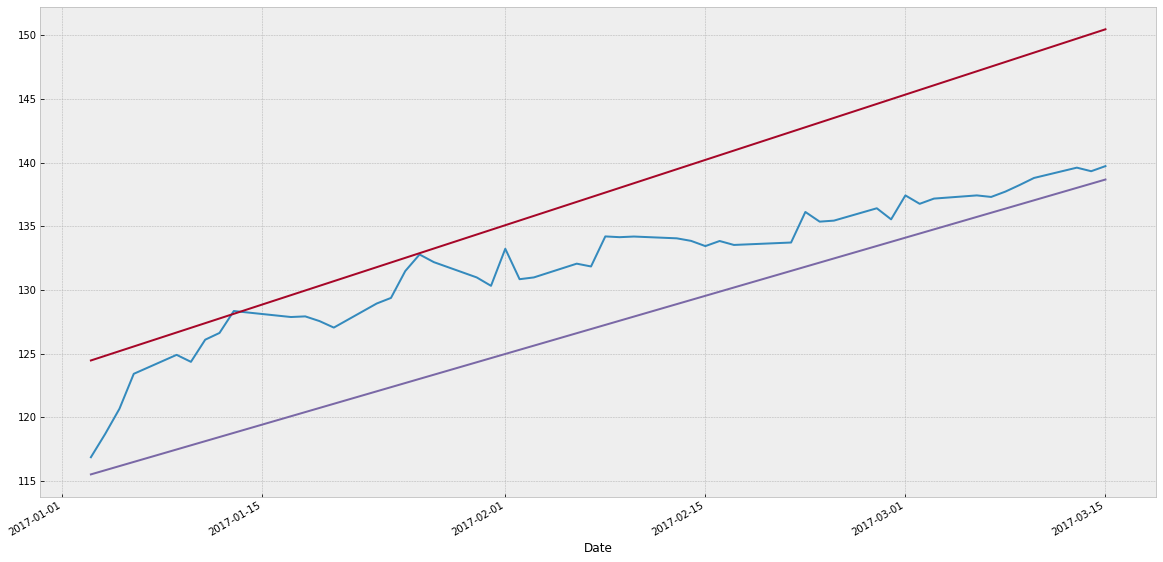

In [22]:
### Plot Channel Trend lines ###
# Some styling
plt.figure(figsize = (20,10))

# Plot
data0['Close'].plot()
data0['high_trend'].plot()
data0['low_trend'].plot()

In [23]:
### SIGNAL - MACD Implementation ####
# Get Stock dataset
data = mac = df.tail(300).copy()

# Calculate MACD Indicator Data
data["macd"], data["sigal"], data["hist"] = ta.MACD(data['Close'])

# Calculate moving average
data["ma10"] = ta.MA(data['Close'], timeperiod=10)
data["ma30"] = ta.MA(data['Close'], timeperiod=30)

# Compute RSI
data["rsi"] = ta.RSI(data['Close'])

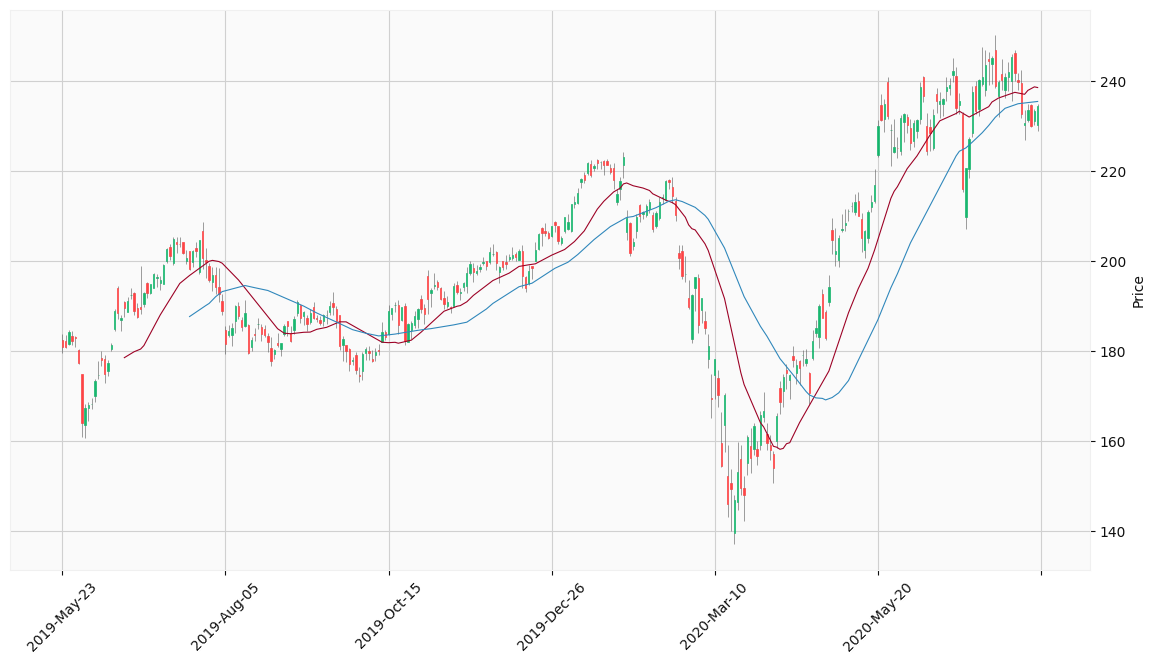

In [24]:
s  = mpf.make_mpf_style(base_mpf_style='yahoo',mavcolors=['#9c0125','#2f87bb'])
# Draw a candle chart
mpf.plot(data, type='candle',
         style=s,
         mav=(20,40),
         figsize=(15,8),
        )

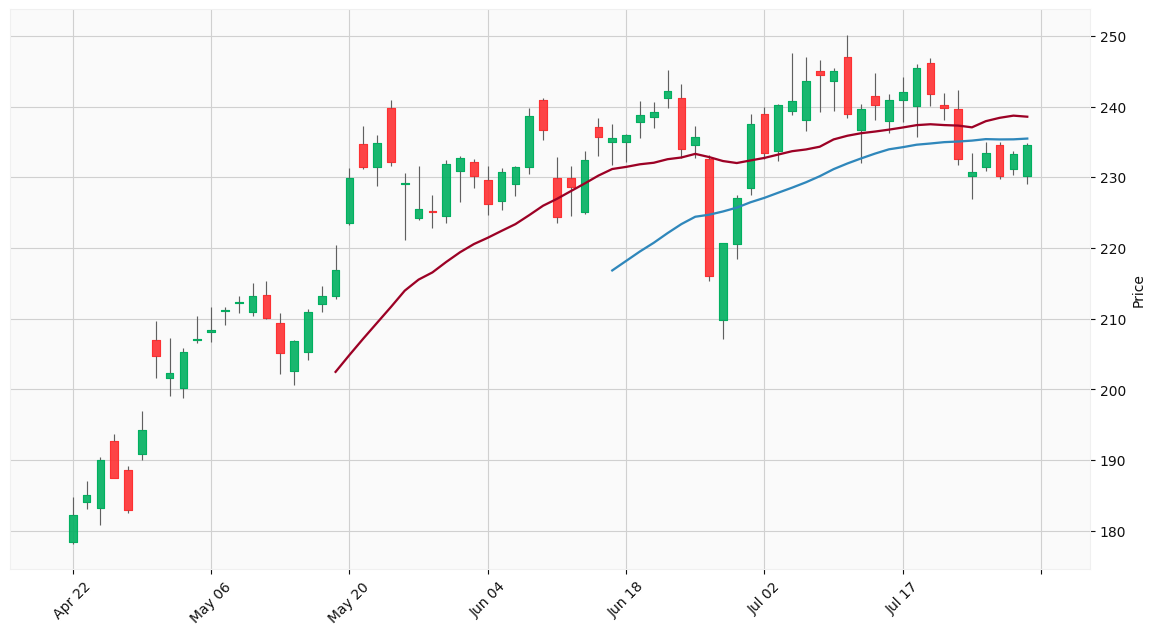

In [25]:
### Draw a candle chart Zoom (50 periods) ###
mpf.plot(data.tail(70), type='candle',
         style=s,
         mav=(20,40),
         figsize=(15,8),
        )

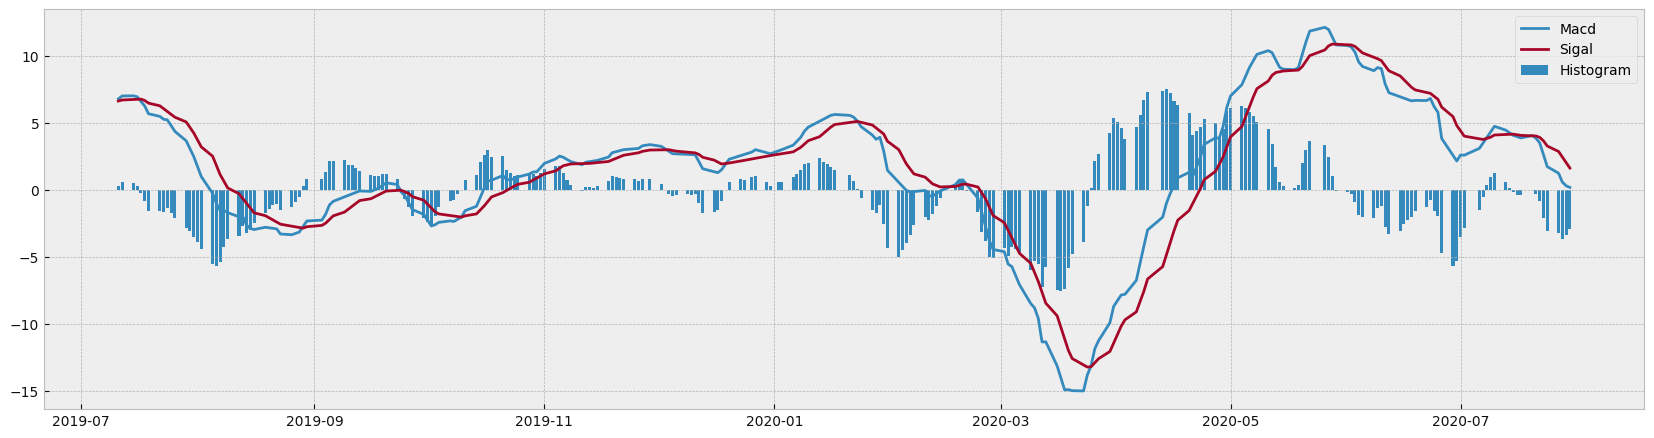

In [92]:
### Plot SIGNAL - MACD ###
# Plot Theme
plt.style.use('bmh')
# Some styling
fig = plt.figure()
fig.set_size_inches((16, 20))
ax_macd = fig.add_axes((0, 0.45, 1, 0.2))

# Draw MACD
ax_macd.plot(data.index, data["macd"], label="Macd")
ax_macd.plot(data.index, data["sigal"], label="Sigal")
ax_macd.bar(data.index, data["hist"] * 2, label="Histogram")
ax_macd.legend()

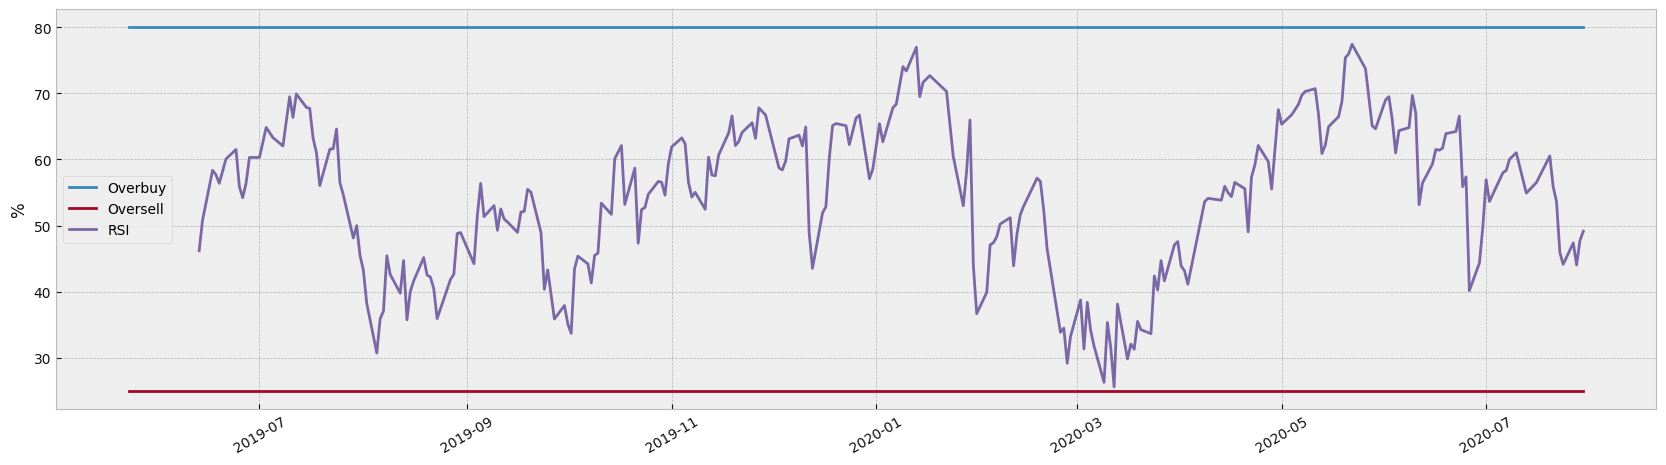

In [78]:
### Show SIGNAL - SRI ###
# Some styling
fig = plt.figure()
fig.set_size_inches((16, 20))
ax_rsi = fig.add_axes((0, 0.23, 1, 0.2))

# Draw RSI
# Over 85% is set to overbuy and over 25% to oversell
ax_rsi.plot(data.index, [80] * len(data.index), label="Overbuy")
ax_rsi.plot(data.index, [25] * len(data.index), label="Oversell")
ax_rsi.plot(data.index, data.rsi, label="RSI")
plt.setp(plt.gca().get_xticklabels(), rotation=30)
ax_rsi.set_ylabel("%")
ax_rsi.legend()

Text(0.5, 0, 'Date')

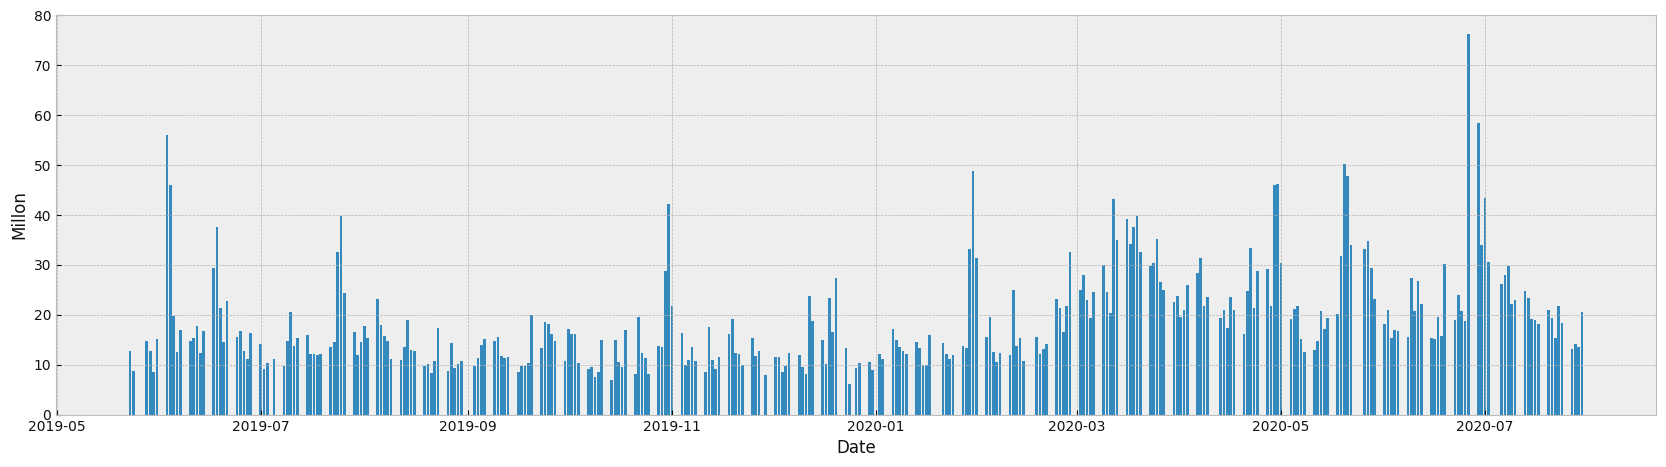

In [80]:
# Some styling
fig = plt.figure()
fig.set_size_inches((16, 20))
ax_vol = fig.add_axes((0, 0, 1, 0.2))

# Divide volume by 100w
ax_vol.bar(data.index, data.Volume / 1000000)
# Set to Millions Bit Units
ax_vol.set_ylabel("Millon")
ax_vol.set_xlabel("Date")

Text(0.5, 0, 'date')

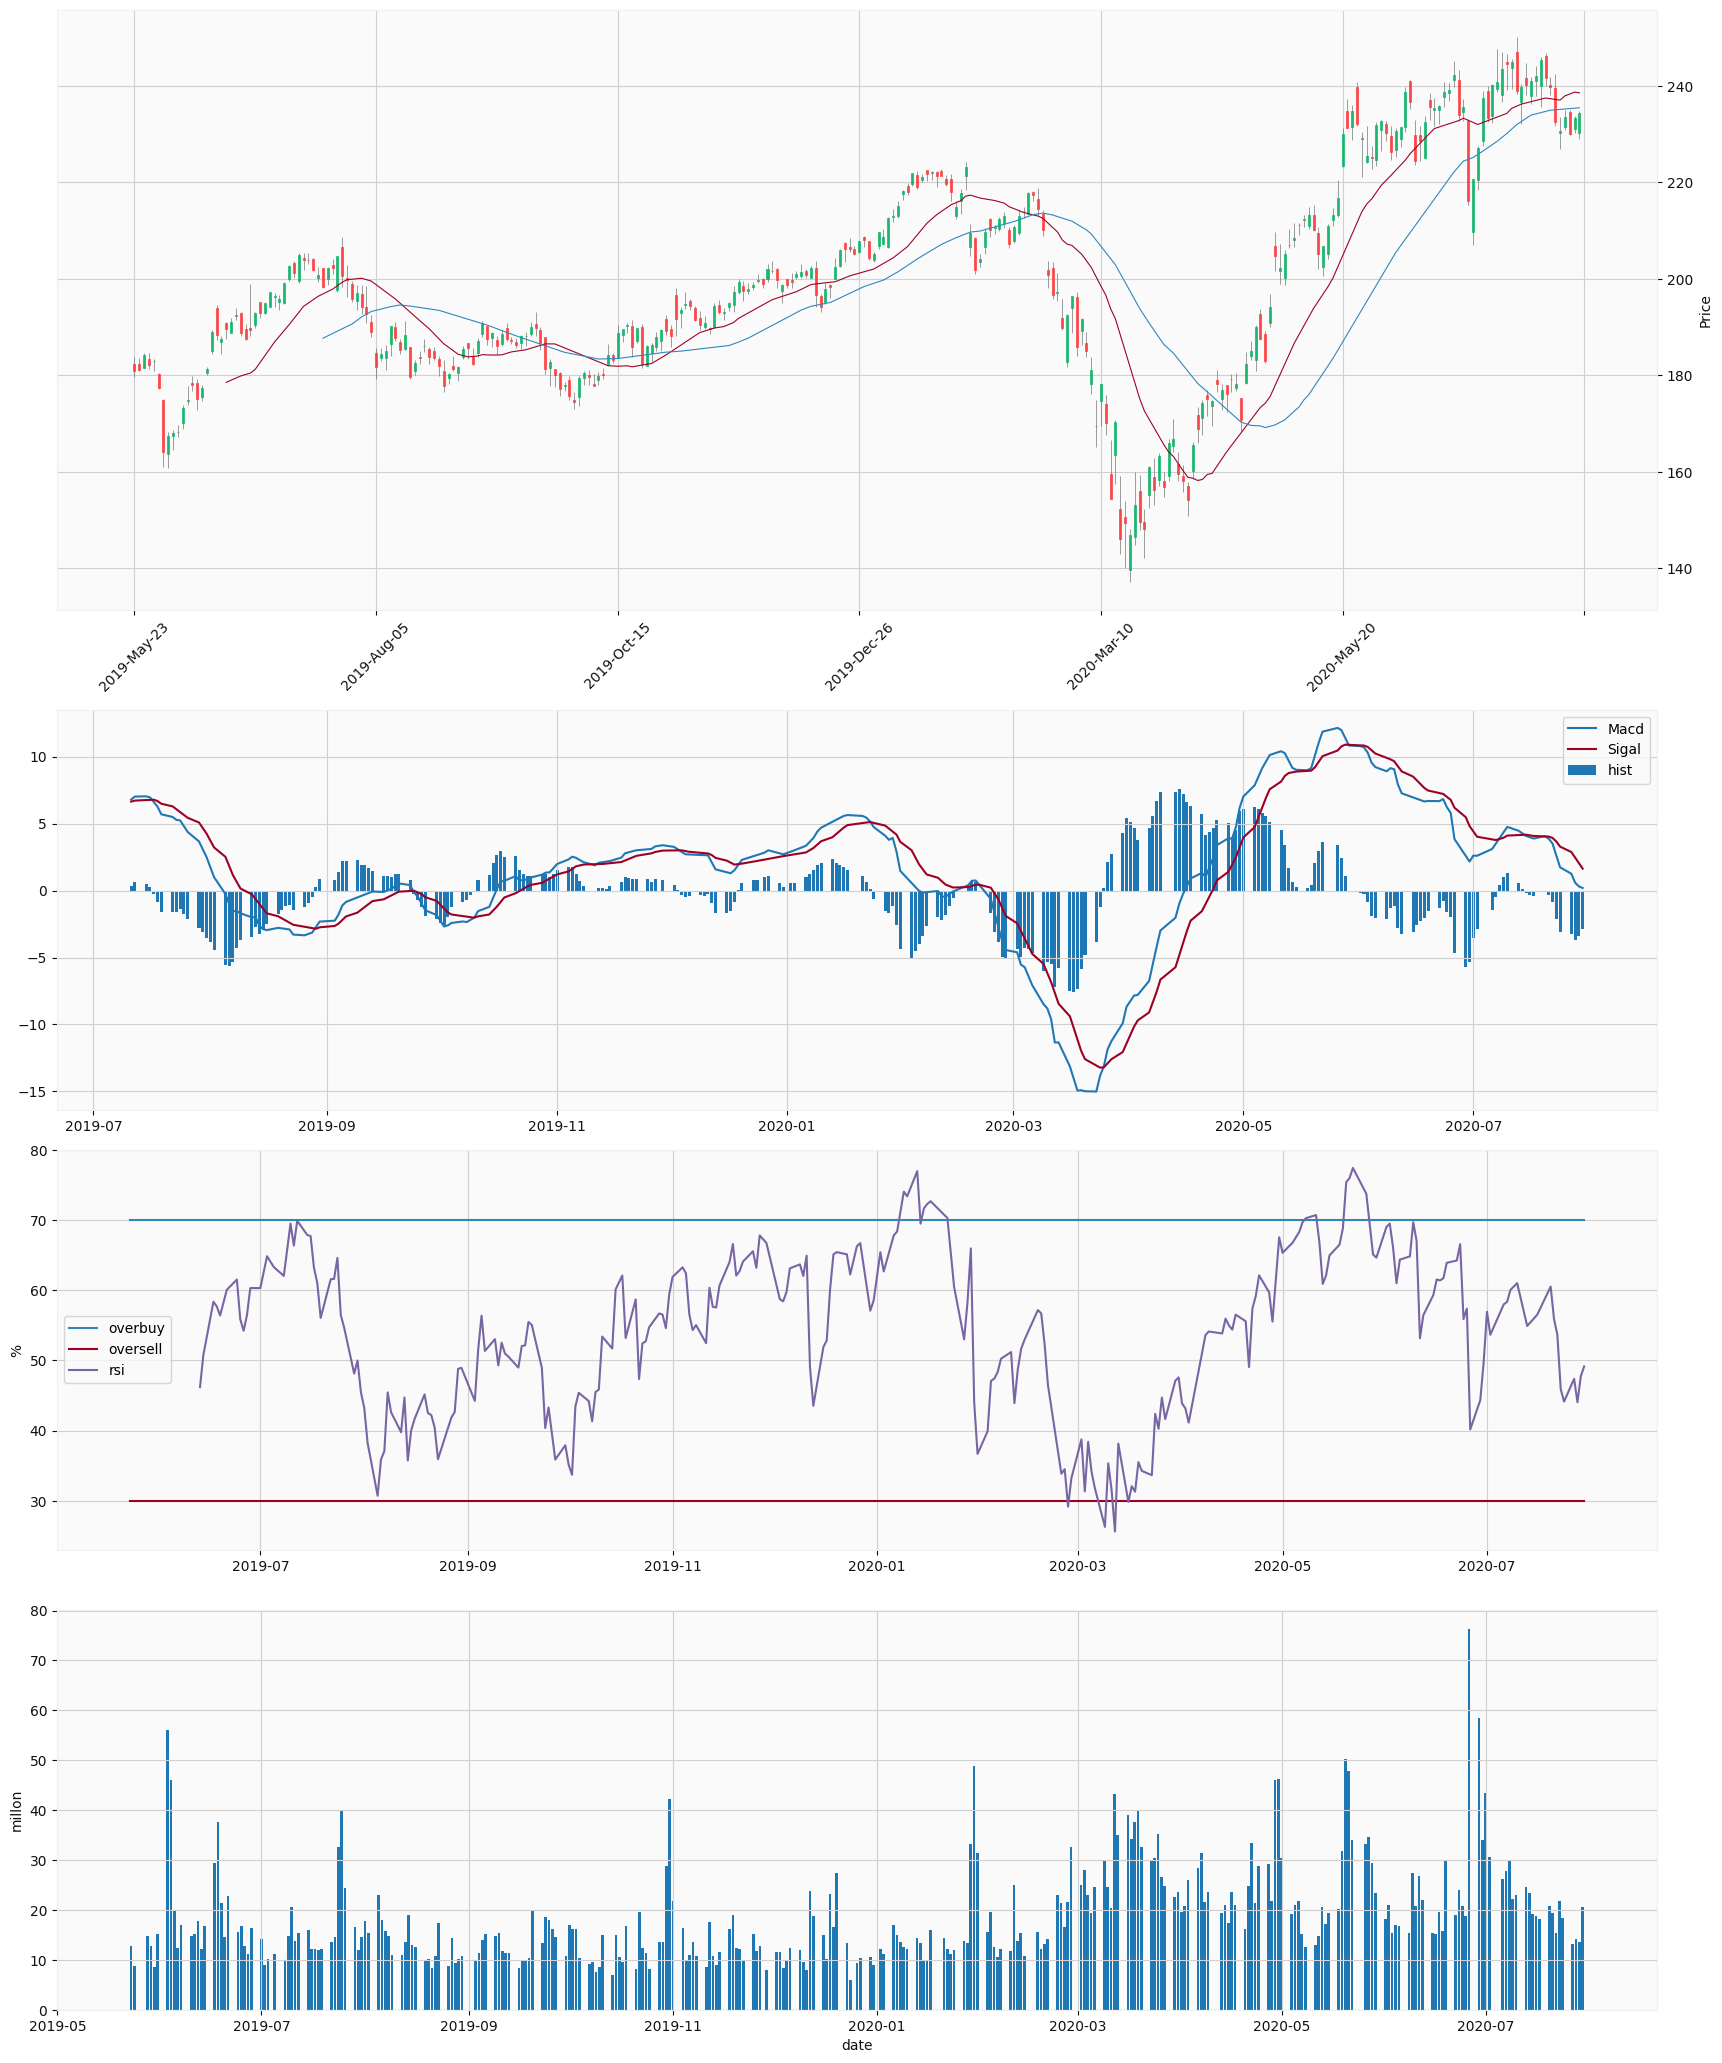

In [7]:
### Putting all together ###
fig = mpf.figure(style='yahoo',figsize=(16, 20))
# Add new axes to the plot
ax_canddle = fig.add_axes((0, 0.7, 1, 0.3))
ax_macd = fig.add_axes((0, 0.45, 1, 0.2))
ax_rsi = fig.add_axes((0, 0.23, 1, 0.2))
ax_vol = fig.add_axes((0, 0, 1, 0.2))

# Draw a candle chart
# Plot my new custom mpf style:
mpf.plot(data, type='candle',
         ax=ax_canddle,
         style=s,
         mav=(20,40), # Moving Average of 20 and 40 periods
        )

# Draw MACD
ax_macd.plot(data.index, data["macd"], label="Macd")
ax_macd.plot(data.index, data["sigal"], color='#9c0125', label="Sigal")
ax_macd.bar(data.index, data["hist"] * 2, label="hist")
ax_macd.legend()

# Draw RSI
# Over 70% is set to overbuy and over 30% to oversell
ax_rsi.plot(data.index, [70] * len(data.index),color='#2f87bb', label="overbuy")
ax_rsi.plot(data.index, [30] * len(data.index), color='#9c0125', label="oversell")
ax_rsi.plot(data.index, data.rsi, color='#7765a4', label="rsi")
ax_rsi.set_ylabel("%")
ax_rsi.legend()

# Divide volume by 100w
ax_vol.bar(data.index, data.Volume / 1000000)
# Set to Millions Bit Units
ax_vol.set_ylabel("millon")
ax_vol.set_xlabel("date")